In [1]:
#!pip install seaborn numpy matplotlib phonopy phono3py
import numpy as np
import seaborn as sns
import pandas as pd
#import phono3py as pn

import matplotlib.pylab as plt
from matplotlib import rcParams
import matplotlib.colors as colors
import matplotlib.cbook as cbook
from matplotlib.lines import Line2D

rcParams.update({'figure.autolayout': True})
sns.set_style("whitegrid", rc={"axes.edgecolor": "k"})
sns.set_style("ticks", {"xtick.major.size":8,"ytick.major.size":8})

sns.set_context("notebook",rc={"grid.linewidth": 0,
                            "font.family":"Helvetica", "axes.labelsize":24.,"xtick.labelsize":24.,
                            "ytick.labelsize":24., "legend.fontsize":20.})

colors = sns.color_palette("colorblind", 12)

In [2]:
# This function determines the k-path length for band structures ######################
# kpoints : a list of the k-points sampled on the k-path. The k-vectors will be determined from this
# POSCAR : the path to the POSCAR file type for this band structure. The simulation cell is taken from this file.
def k_path_dft(kpoints, POSCAR): # poscar is path to output file (./POSCAR)
    kvectors = []
    for i in range(0,len(kpoints)-1):
        vector = [kpoints[i+1][0]-kpoints[i][0], kpoints[i+1][1]-kpoints[i][1], kpoints[i+1][2]-kpoints[i][2]]
        kvectors.append(vector)
   
    simulation_cell = pd.read_csv(POSCAR, header=None, delim_whitespace=True, skiprows=[0,1], nrows=3)
   
    klength = []
    for i in range(0,len(kvectors)): # norm of dot prod of kpoints (to change scale)
        distance = np.linalg.norm(np.dot(kvectors[i], simulation_cell))
        klength.append(np.pi/distance)
       
    kpath = np.linspace(0, np.sum(klength), 600) # num is total num of kpoints (100 per vector)
    return kpath

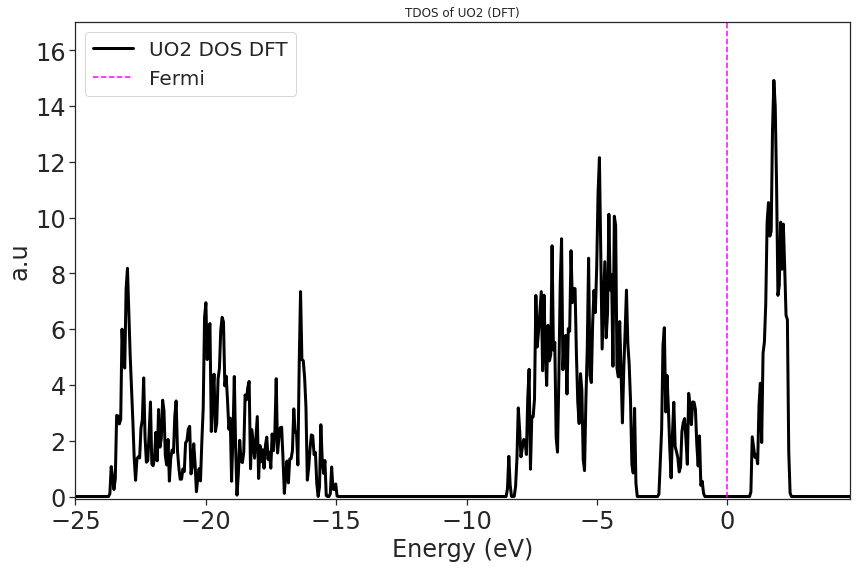

In [3]:
# density of state
TDOS = np.array(np.loadtxt('./UO2/DFT/3-DOS/TDOS.dat'))
fermi = (1.70561 - (-0.00639)) / 2 + (-0.00639)
# plot TDOS
fig1 = plt.figure(figsize=(12,8))
plt.plot(TDOS[:,0]-fermi, TDOS[:,1], color='k',lw=3, label='UO2 DOS DFT')
plt.vlines(0,-10,110,color='magenta',linestyle='dashed', label='Fermi')
plt.xlabel('Energy (eV)')
plt.ylabel('a.u')
plt.xlim(-25,TDOS[-1,0]-fermi)
plt.ylim(-0.1,17)
plt.legend()
plt.title('TDOS of UO2 (DFT)')
plt.savefig('./figures/UO2-DOS-DFT.jpeg',  bbox_inches='tight', pad_inches = 1, dpi=400)
plt.show()

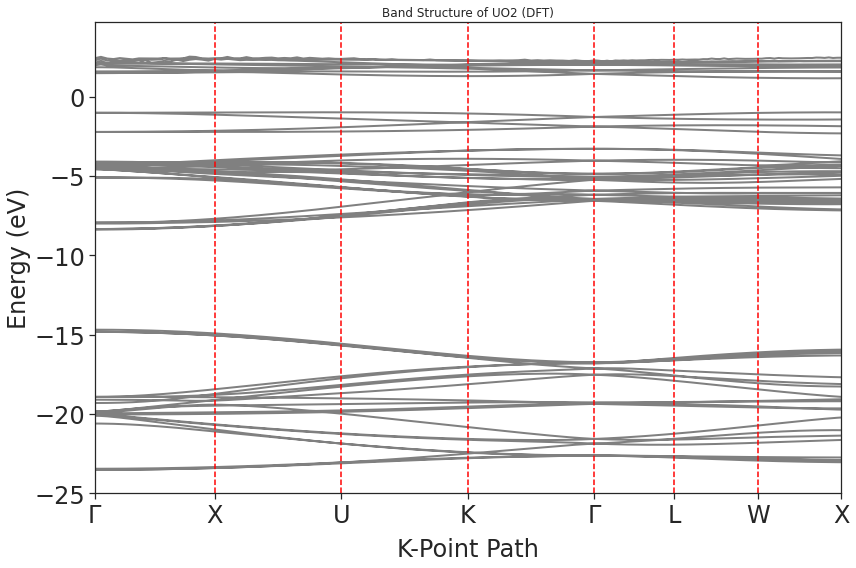

In [4]:
# band structure
# 
KPOINTS = [[0,0,0],[0.5,0,0.5],[0.625,0.25,0.625],[0.375,0.375,0.75],[0,0,0],[0.5,0.5,0.5],[0.5,0.25,0.75],[0.5,0,0.5]] # copied from KPOINTS

fermi = (1.70561 - (-0.00639)) / 2 + (-0.00639)
Bands_UO2_DFT = np.array(np.loadtxt("./UO2/DFT/4-BS/BAND.dat")) # update this ho
KPATH_UO2_DFT = k_path_dft(KPOINTS, "./UO2/DFT/4-BS/POSCAR") # update this to be my poscar
# bilbalo chrystallogrphic server, symmetry, kvec, choose sym for struct, #227 Fd-3m, kvectors ##############3
#print('shape', np.shape(Bands_Xe_DFT))
#print(KPATH_Xe_DFT)

############# v plot BS
fig3 = plt.figure(figsize=(12,8))
plt.plot(Bands_UO2_DFT[:,0], Bands_UO2_DFT[:,1:-1]-fermi, color='grey', lw=2)#, label='Xe_BS_DFT') # use first column of reformatted bands to be x vals =
kpts=[Bands_UO2_DFT[0,0],Bands_UO2_DFT[19,0],Bands_UO2_DFT[39,0],Bands_UO2_DFT[59,0],Bands_UO2_DFT[79,0],Bands_UO2_DFT[99,0],Bands_UO2_DFT[119,0],Bands_UO2_DFT[139,0]]# location of kpts from dataset
plt.xticks(kpts,['\u0393','X','U','K','\u0393','L','W','X'])
plt.vlines(kpts[1:7],-25,TDOS[-1,0]-fermi,color='red',linestyle='dashed')
plt.xlabel('K-Point Path', labelpad = 10)
plt.ylabel('Energy (eV)', labelpad = 3)
plt.xlim(Bands_UO2_DFT[0,0],Bands_UO2_DFT[139,0])
plt.ylim(-25,TDOS[-1,0]-fermi)
#plt.legend()
plt.title('Band Structure of UO2 (DFT)')
################### v DOS plot
#plt.subplot(122)
#plt.plot(DOS_AA_DFT[:,1]/5, DOS_AA_DFT[:,0]-(BandGap_AA_DFT/2), color='purple')
#plt.text(2, -0.25, f'{COF_AA}-DFT = {BandGap_AA_DFT} eV', color='purple', fontsize=16)
#plt.xlabel('DOS', labelpad=10)
#plt.ylim(-2,2)
#plt.xlim(0,60)
#plt.hlines(ConductionBand_AA_DFT-(BandGap_AA_DFT/2),0,80,color='purple',linestyle='dashed')
#plt.hlines(ValenceBand_AA_DFT-(BandGap_AA_DFT/2),0,80,color='purple',linestyle='dashed')

plt.savefig('./figures/UO2-BS-DFT.jpeg',  bbox_inches='tight', pad_inches = 1, dpi=400)
plt.show()